# Credit Card Fraud Detection

A prevalent form of identity theft, credit card fraud has risen by 72.4% in the United States from 2018 to 2019 as reported in the Consumer Sentinel Network Data Book 2019 released by United States independent agency Federal Trade Commission. While this figure may be different for other nations, credit card fraud is a global challenge that severely affects both consumers and financial institutions.

In order to combat credit card fraud and save themselves the ill-fate of losing billions of dollars, financial institutions employ among other measures machine learning techniques to detect fraudulent transactions.

## What do we want to do?

Given a dataset of transactions made by credit cards and their categorization into fraud and legitimate, we want to explore this data and build a model to classify transactions unseen by the model into fraudulent and non-fraudulent.

## What does a good solution look like?

In credit card fraud detection, it is imperative that we label as many as possible fraudulent transactions as fraudulent.

## 1. Load required libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting visuals
from collections import Counter
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
import math


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcarddataset/creditcard_sample.csv
/kaggle/input/creditcardfraud/creditcard.csv


## 2. Read data and segregate test data from the rest

In this section, the credit card fraud data is read into a dataframe. Further, the size of the dataset is noted and its contents are displayed.

Read sample data based on which algorithm was developed.

In [2]:
sample = pd.read_csv('../input/creditcarddataset/creditcard_sample.csv')
print(sample.shape)

(227845, 32)


In [3]:
sample.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

Read full data that includes both training and test data.

In [4]:
full_data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
print(full_data.shape)

(284807, 31)


In [5]:
full_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Calculate length of training set size as an 80% sample of the full data set

In [6]:
sample_size = math.floor(len(full_data)*0.8)
print(sample_size)

227845


Segregate 80% data from full dataset to use for data exploration and model training

In [7]:
raw_data = full_data.sample(n = sample_size, random_state = 1)
print(raw_data.shape)

(227845, 31)


Segregate remaining 20% data from full dataset as test data

In [8]:
test_data_raw = full_data[~full_data.index.isin(raw_data.index)]
print(test_data_raw.shape)

(56962, 31)


Reset index of the two dataframes

In [9]:
raw_data.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
1,127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
2,137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
3,21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
4,134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,265486,161906.0,2.158550,-0.919931,-0.901455,-1.104434,-0.498188,0.056283,-0.924423,0.008515,...,0.248345,0.747434,0.130872,0.329433,-0.093102,-0.207438,-0.003007,-0.054035,19.20,0
227841,266171,162218.0,-1.437810,0.198053,0.176389,-3.070344,-1.156125,-0.299827,-1.023645,0.871608,...,0.036402,0.164698,-0.082443,0.735386,-0.164048,-0.361517,-0.270025,0.062326,14.00,0
227842,49037,43885.0,-1.705280,-1.128554,0.607383,-0.877637,-1.758511,0.383241,3.031279,-0.199725,...,0.500892,0.210662,1.315839,0.052695,0.272085,0.955016,-0.255103,0.117569,670.39,0
227843,242565,151546.0,-0.964271,-0.043073,1.297015,-3.133226,-1.004501,-0.302242,-0.637247,0.574619,...,-0.131273,-0.061240,-0.378254,-0.375611,0.674617,-0.114479,0.149058,0.029520,6.00,0


In [10]:
test_data_raw.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,15,12.0,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
4,26,23.0,1.173285,0.353498,0.283905,1.133563,-0.172577,-0.916054,0.369025,-0.327260,...,0.067003,0.227812,-0.150487,0.435045,0.724825,-0.337082,0.016368,0.030041,41.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0
56958,284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
56959,284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
56960,284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0


## 3. Explore data

In [11]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
# Commented this out as full data set does not have the column 'Unnamed: 0'
# data = raw_data.drop(columns = ['Unnamed: 0'])

In [13]:
data = raw_data

In [14]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The distribution of all variables present in the dataset is studied by plotting a histogram for each of them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62596ee950>,
      dtype=object)

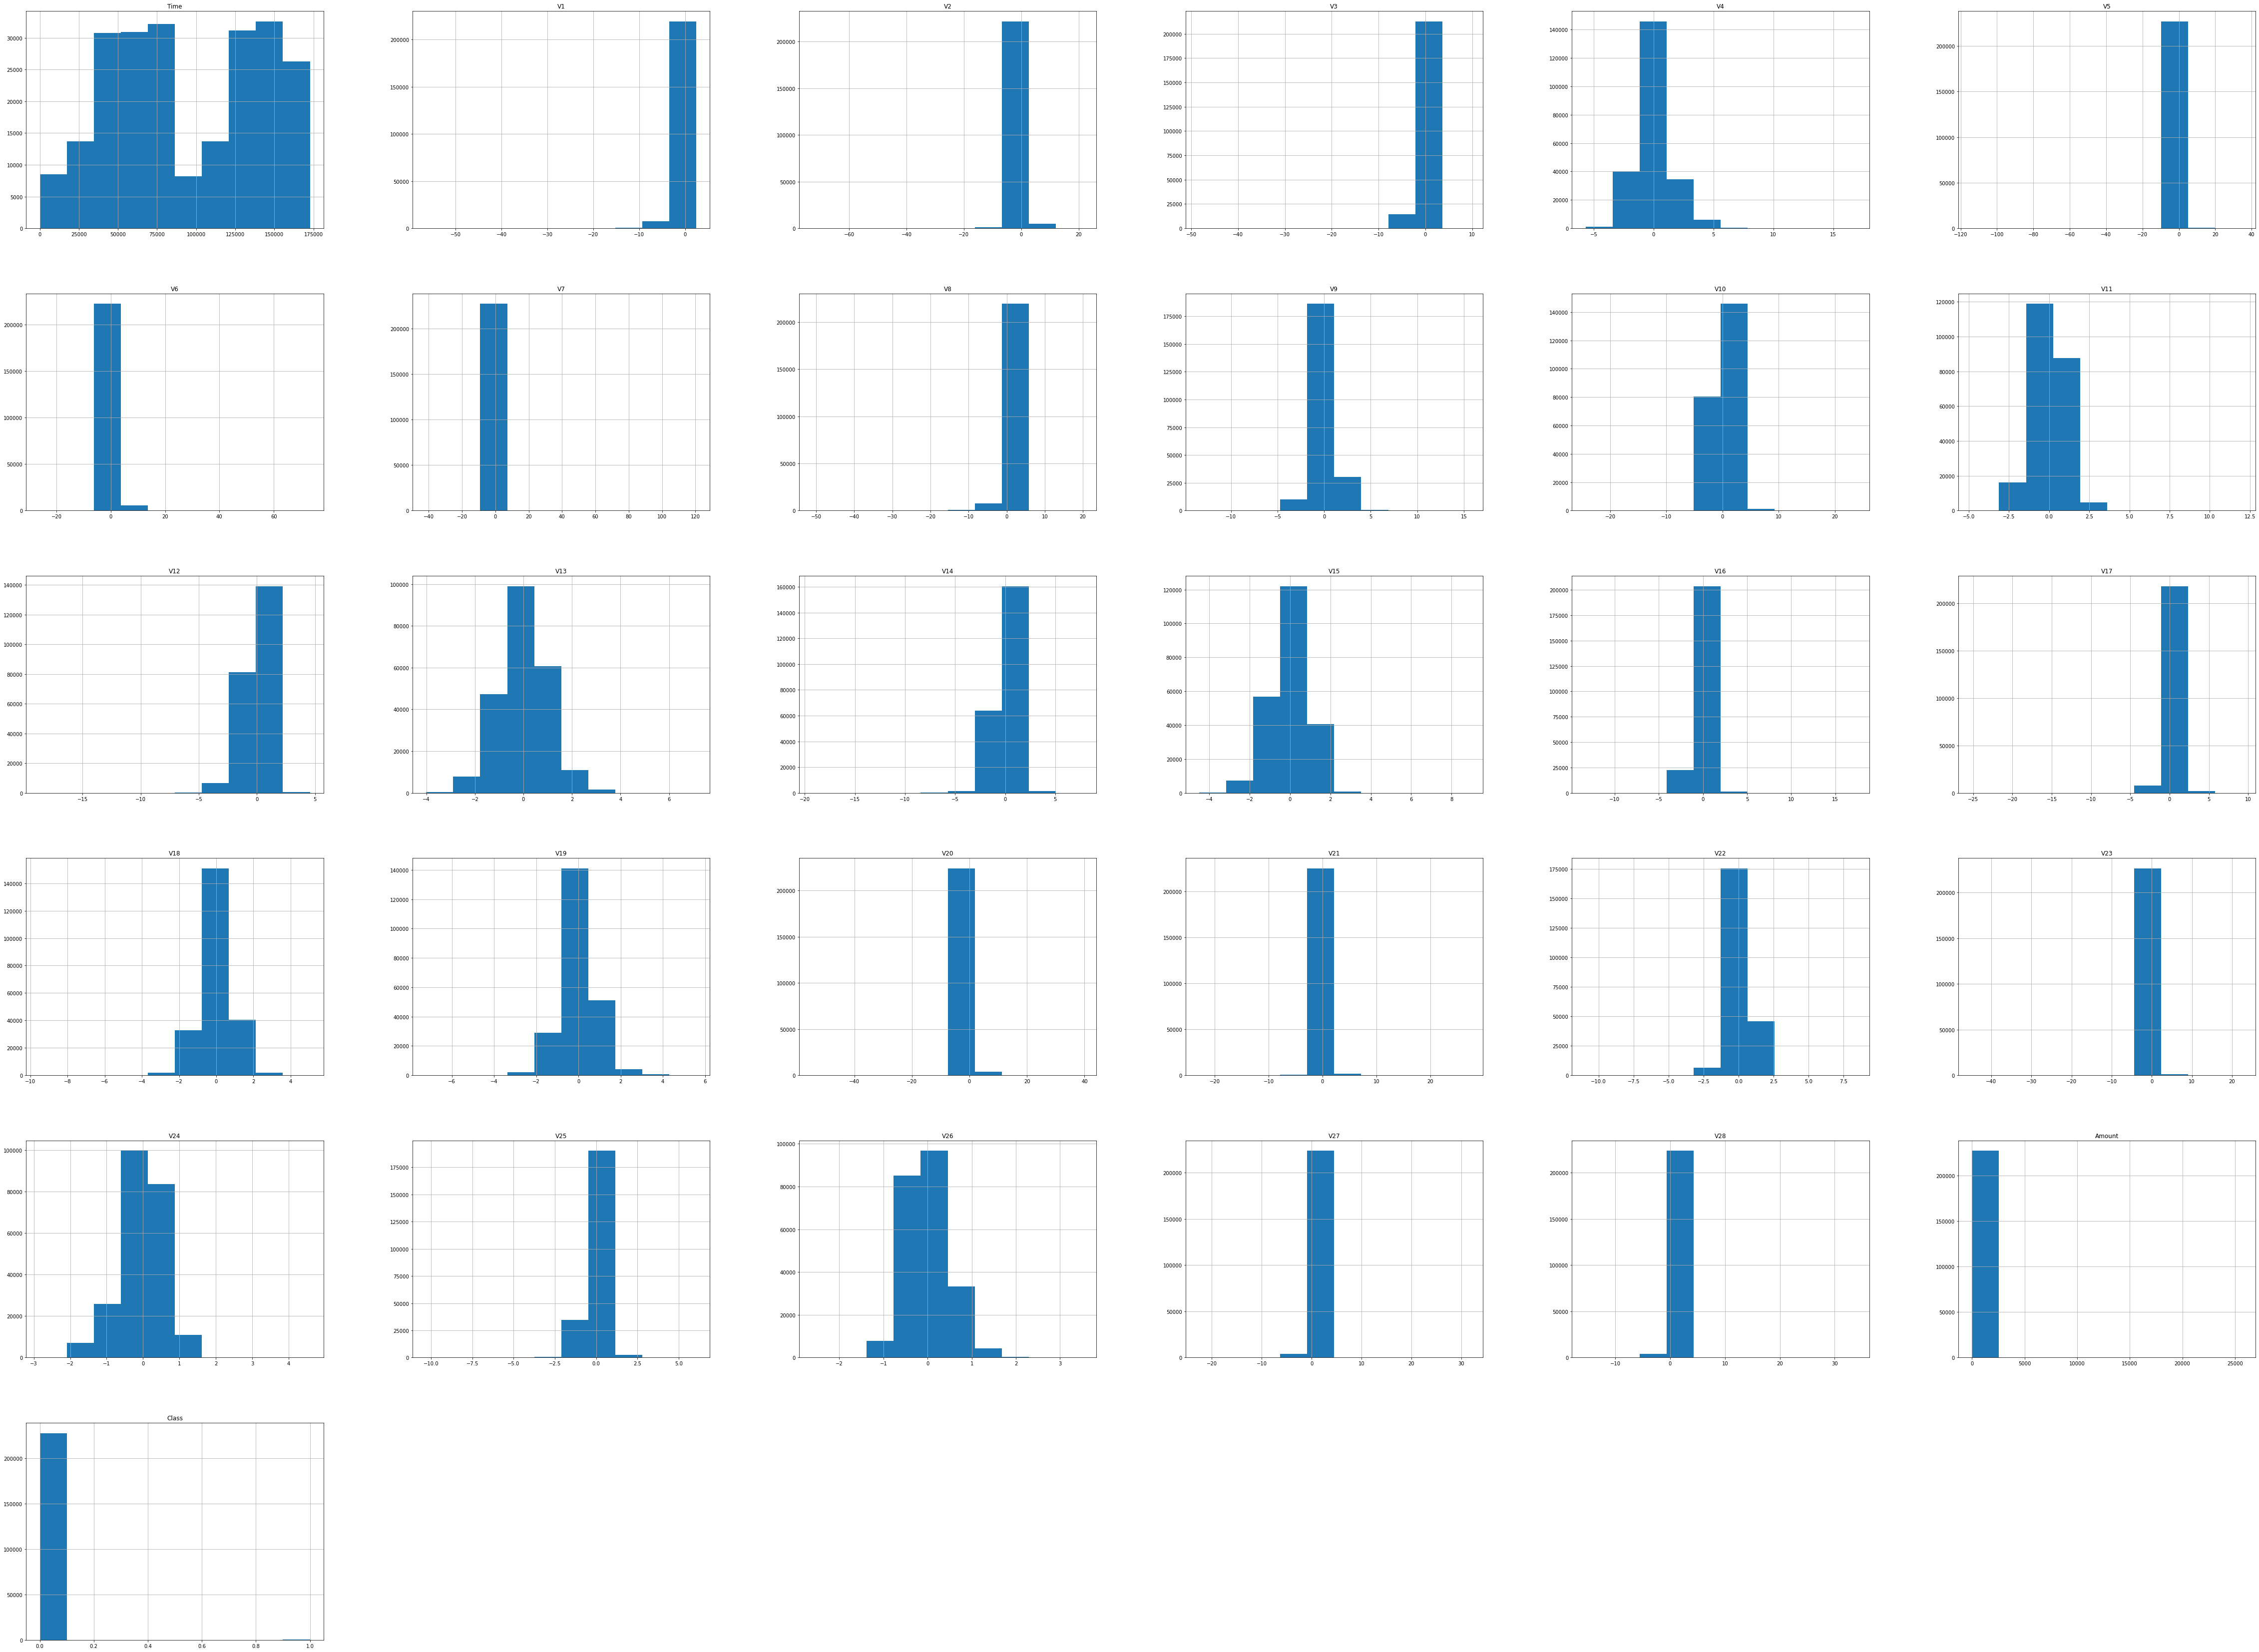

In [16]:
data.hist(figsize=(80,60))

In [17]:
data['Class'].value_counts()

0    227447
1       398
Name: Class, dtype: int64

With much less fraudelent transactions than legitimate transactions, the data is observed to be heavily imbalanced. When significant class imbalance exists such as in this case, classification models can fail to correctly detect the minority class, which is the more important class. Therefore, as will be discussed later, treatments will be applied to data to address the problem of imbalanced classes and achieve improved results.

### Check for correlation between features

In [18]:
cor_matrix = data.corr().abs()
cor_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.118237,0.009512,0.419082,0.105038,0.171252,0.063084,0.085113,0.037777,0.008494,...,0.044935,0.145633,0.052349,0.016109,0.232023,0.040017,0.005292,0.009710,0.010882,0.012255
V1,0.118237,1.000000,0.001841,0.000435,0.000391,0.001692,0.002994,0.000522,0.010462,0.002394,...,0.004936,0.000087,0.006044,0.000081,0.000421,0.000007,0.002676,0.020191,0.230694,0.103481
V2,0.009512,0.001841,1.000000,0.003082,0.000803,0.002041,0.000098,0.000464,0.010255,0.001050,...,0.001967,0.001289,0.011598,0.000207,0.001081,0.000432,0.007878,0.017306,0.533104,0.091771
V3,0.419082,0.000435,0.003082,1.000000,0.000880,0.006164,0.002346,0.003327,0.009806,0.001113,...,0.002631,0.000371,0.002579,0.000245,0.001588,0.000900,0.002454,0.008739,0.213388,0.194982
V4,0.105038,0.000391,0.000803,0.000880,1.000000,0.003510,0.000213,0.000376,0.001812,0.001252,...,0.000328,0.000400,0.001466,0.000546,0.000111,0.000309,0.001619,0.004467,0.101584,0.134596
V5,0.171252,0.001692,0.002041,0.006164,0.003510,1.000000,0.005599,0.011091,0.003106,0.001769,...,0.000221,0.000099,0.003196,0.002756,0.000633,0.000655,0.006712,0.000929,0.393382,0.096487
V6,0.063084,0.002994,0.000098,0.002346,0.000213,0.005599,1.000000,0.012409,0.008480,0.000473,...,0.004540,0.001255,0.002859,0.002059,0.000078,0.000297,0.004701,0.002223,0.219191,0.044379
V7,0.085113,0.000522,0.000464,0.003327,0.000376,0.011091,0.012409,1.000000,0.028834,0.003728,...,0.010303,0.002522,0.004826,0.002091,0.000962,0.000607,0.008599,0.007662,0.408783,0.187444
V8,0.037777,0.010462,0.010255,0.009806,0.001812,0.003106,0.008480,0.028834,1.000000,0.005939,...,0.023307,0.006510,0.009102,0.001733,0.000929,0.001334,0.002381,0.006009,0.108222,0.027210
V9,0.008494,0.002394,0.001050,0.001113,0.001252,0.001769,0.000473,0.003728,0.005939,1.000000,...,0.002302,0.000776,0.001180,0.001649,0.001765,0.000862,0.000690,0.007565,0.045104,0.098677


In [19]:
p = cor_matrix.unstack()
p_sorted = p.sort_values(kind="quicksort", ascending = False)
p_sorted[p_sorted<1]

Amount  V2        0.533104
V2      Amount    0.533104
Time    V3        0.419082
V3      Time      0.419082
Amount  V7        0.408783
                    ...   
V26     V11       0.000014
V16     V10       0.000011
V10     V16       0.000011
V1      V26       0.000007
V26     V1        0.000007
Length: 930, dtype: float64

High correlations between any pair of columns do not exist.

<Figure size 1368x1080 with 0 Axes>

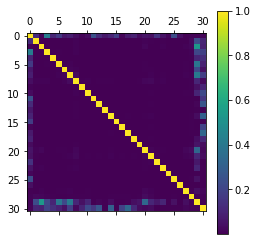

In [20]:
plt.figure(figsize=(19,15))
plt.matshow(cor_matrix)
plt.colorbar()

### Check for multicollinearity among features

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. It can be a problem in a regression model because we will not be able to distinguish between the individual effects of the independent variables on the dependent variable. While we have already checked for correlation between pairs of features and found none, we will now inspect if a column is correlated with a combination of two of more other columns.

Variable Inflation Factors (VIF) is adopted to check for multicollinearity. VIF score of an independent variable represents how well the variable is explained by other independent variables and high VIF value indicates the presence of multicollinearity.

In [21]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [22]:
X = data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Time,2.366113
1,V1,1.659162
2,V2,3.972917
3,V3,1.271676
4,V4,1.144677
5,V5,2.841395
6,V6,1.542289
7,V7,2.580724
8,V8,1.102467
9,V9,1.018686


Amount has a high VIF value, which means there is high multicollinearity between Amount and other variables. Resultantly, Amount should be dropped.

## 4. Data pre-processing

The data is split into features and class. After dropping Amount, all relevant features are assigned to dataframe X and class to dataframe Y. VIF is recalculated on X to ensure elimination of multicollinearity.

In [23]:
X = data.drop(['Amount','Class'],axis=1)
calc_vif(X)

,variables,VIF
0,Time,1.103535
1,V1,1.003926
2,V2,1.000951
3,V3,1.039516
4,V4,1.002457
5,V5,1.006924
6,V6,1.001330
7,V7,1.003092
8,V8,1.002843
9,V9,1.000173


VIF is low for all features. Thus, multicollinearity is removed.

In [24]:
y = data['Class']

## 5. Split data into training and validation

As the classes are imbalanced, the data must be split into training and validation sets in a stratified fashion. Here, the ratio of 4:1 is chosen for split.

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(182276, 29) (45569, 29) (182276,) (45569,)


## 6. Scale data

### Normalize

In [26]:
def normalizer(X_train):
    normalizer = MinMaxScaler().fit(X_train)
    return normalizer

In [27]:
# normalizer = normalizer(X_train)

In [28]:
def normalize_X(normalizer, X):
    X_norm = normalizer.transform(X)
    X_norm = pd.DataFrame(X_norm) 
    return X_norm

In [29]:
# X_train_scaled = normalize_X(normalizer, X_train)
# X_train_scaled.hist(figsize = (80,60))

In [30]:
# X_val_scaled = normalize_X(normalizer, X_val)
# X_val_scaled.hist(figsize = (80,60))

### Standardize
The training set is standardized such that the mean of each feature is 0 and the standard deviation of each feature is 1. Further, the coefficients obtained on standardization of the training set are retained and later applied to the validation and testing sets to standardize them.

In [31]:
def standardizer(X_train):
    standardizer = StandardScaler().fit(X_train)
    return standardizer

In [32]:
standardizer = standardizer(X_train)

In [33]:
def standardize_X(standardizer, X):
    X_std = standardizer.transform(X)
    X_std = pd.DataFrame(X_std) 
    return X_std

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6258a5ed90>,
      dtype=object)

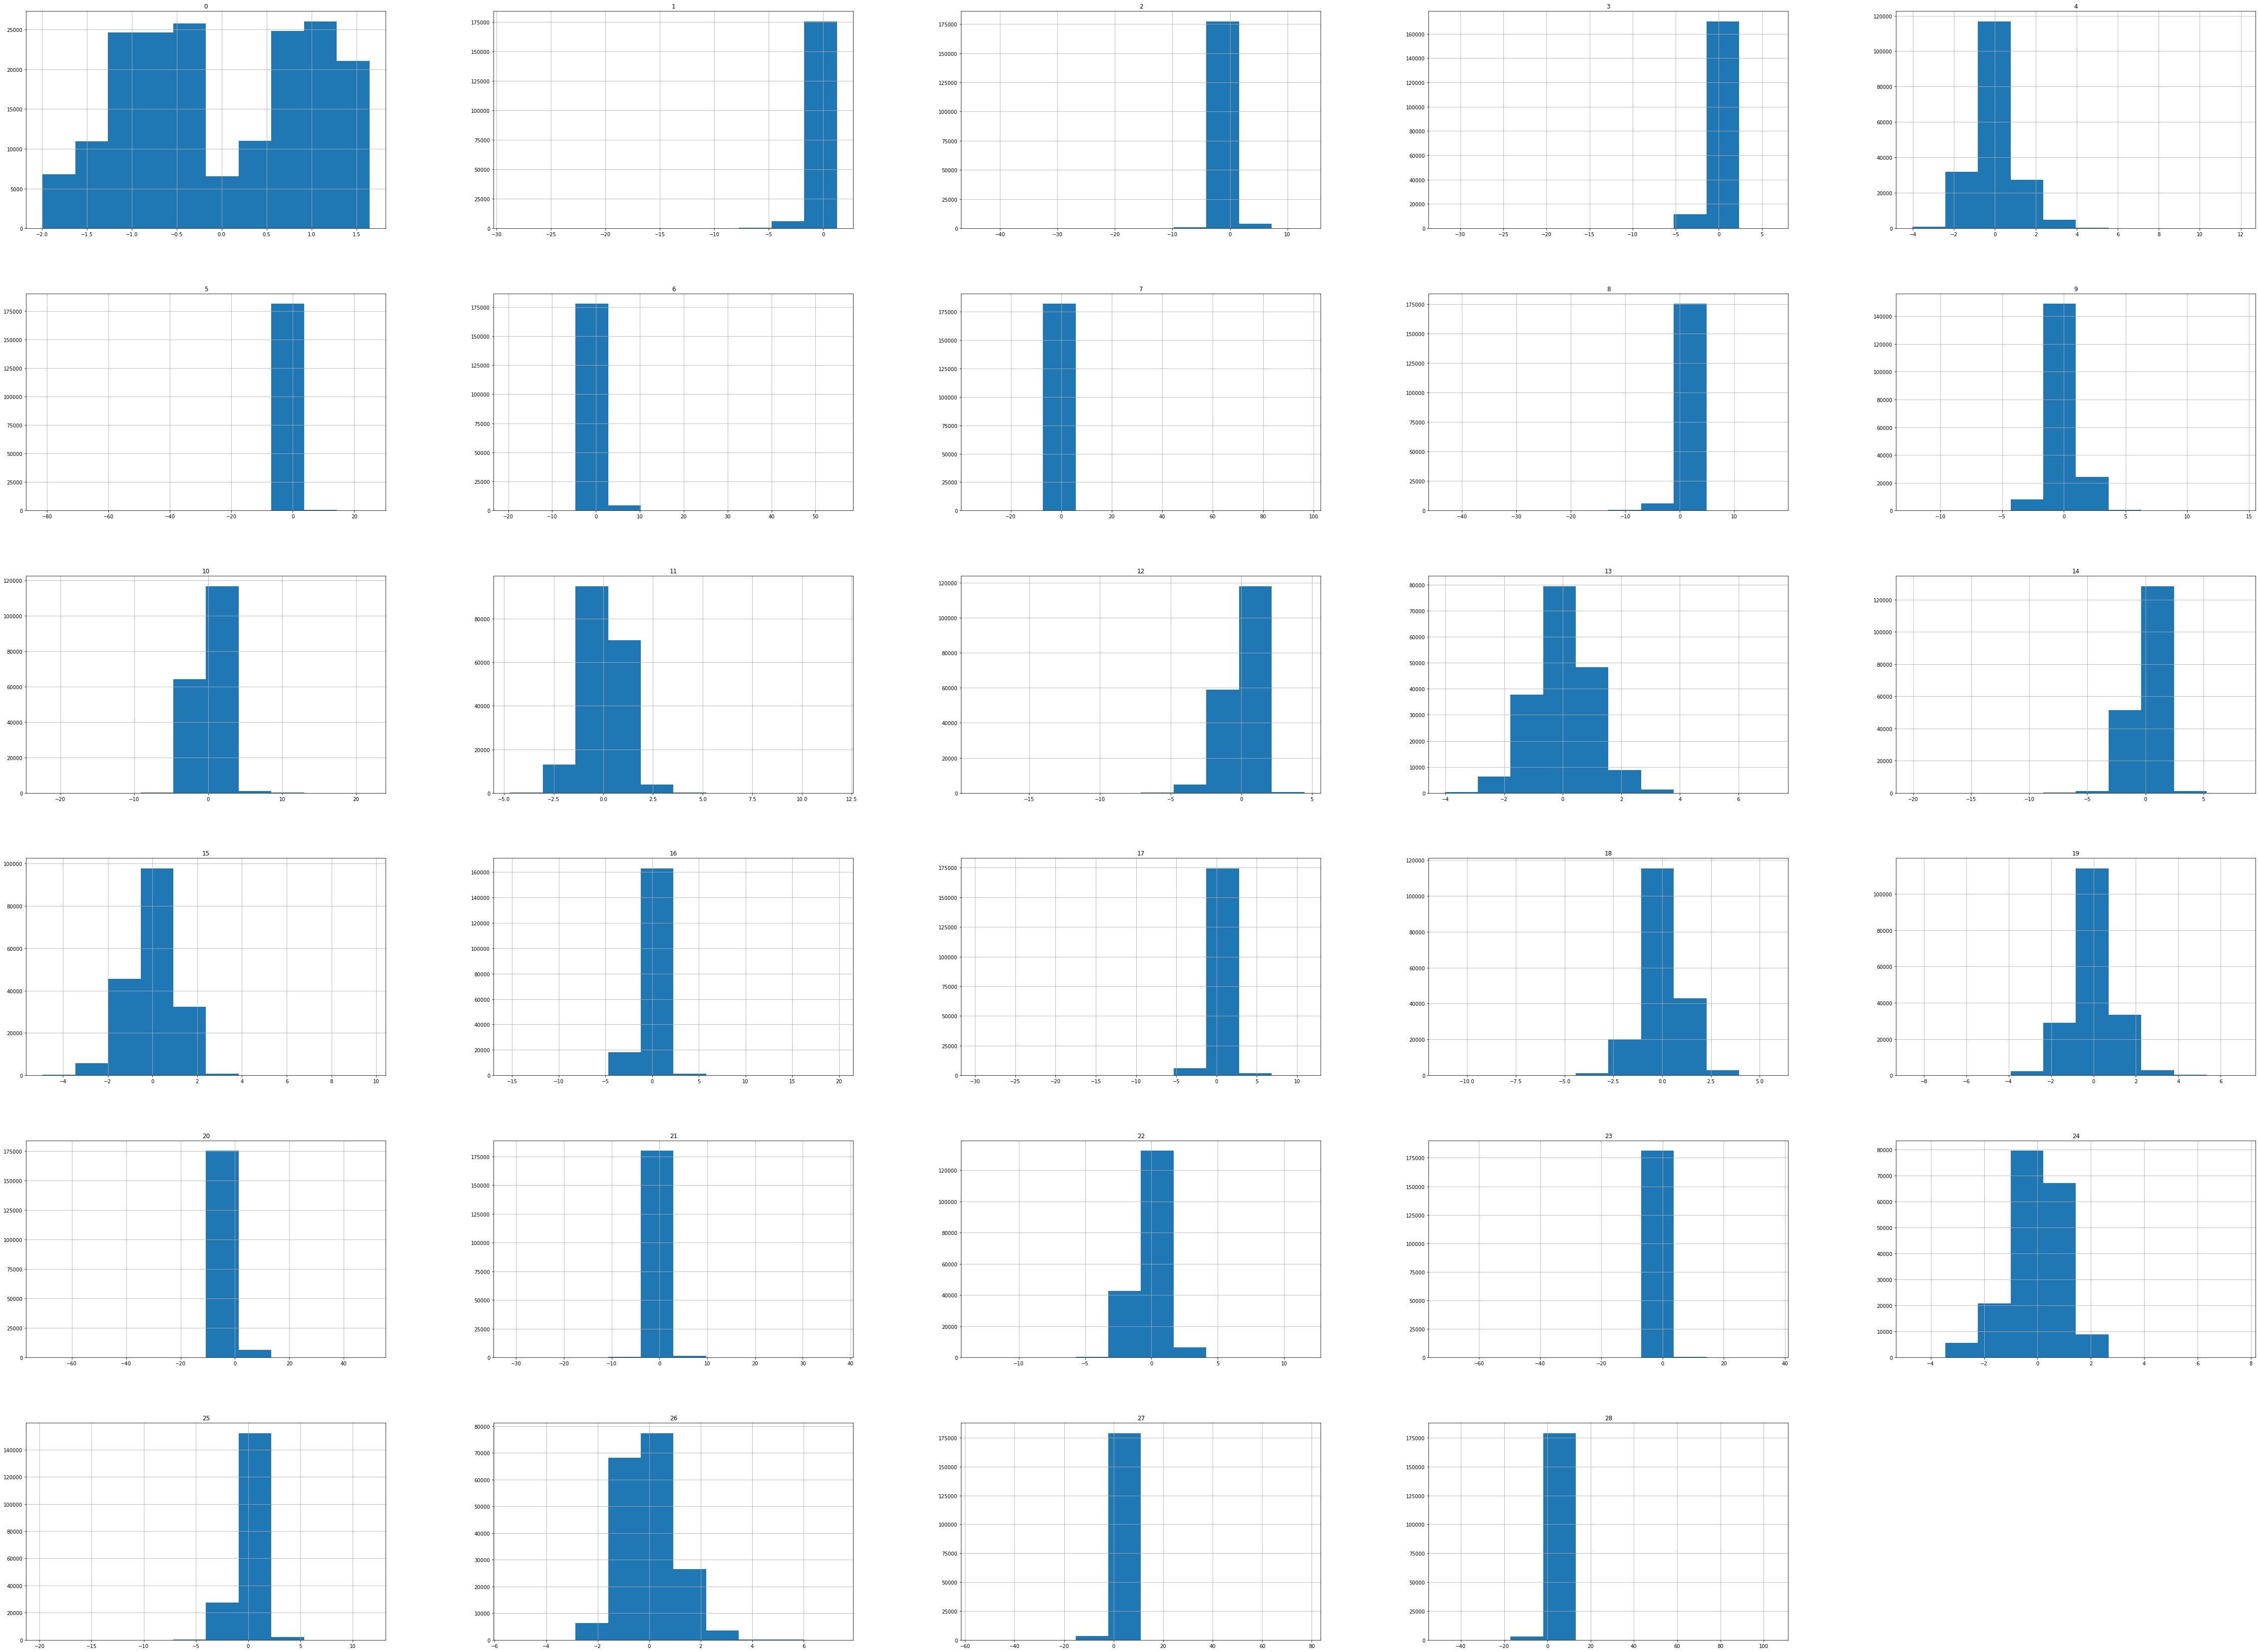

In [34]:
X_train_scaled = standardize_X(standardizer, X_train)
X_train_scaled.hist(figsize = (80,60))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6258b1cb10>,
      dtype=object)

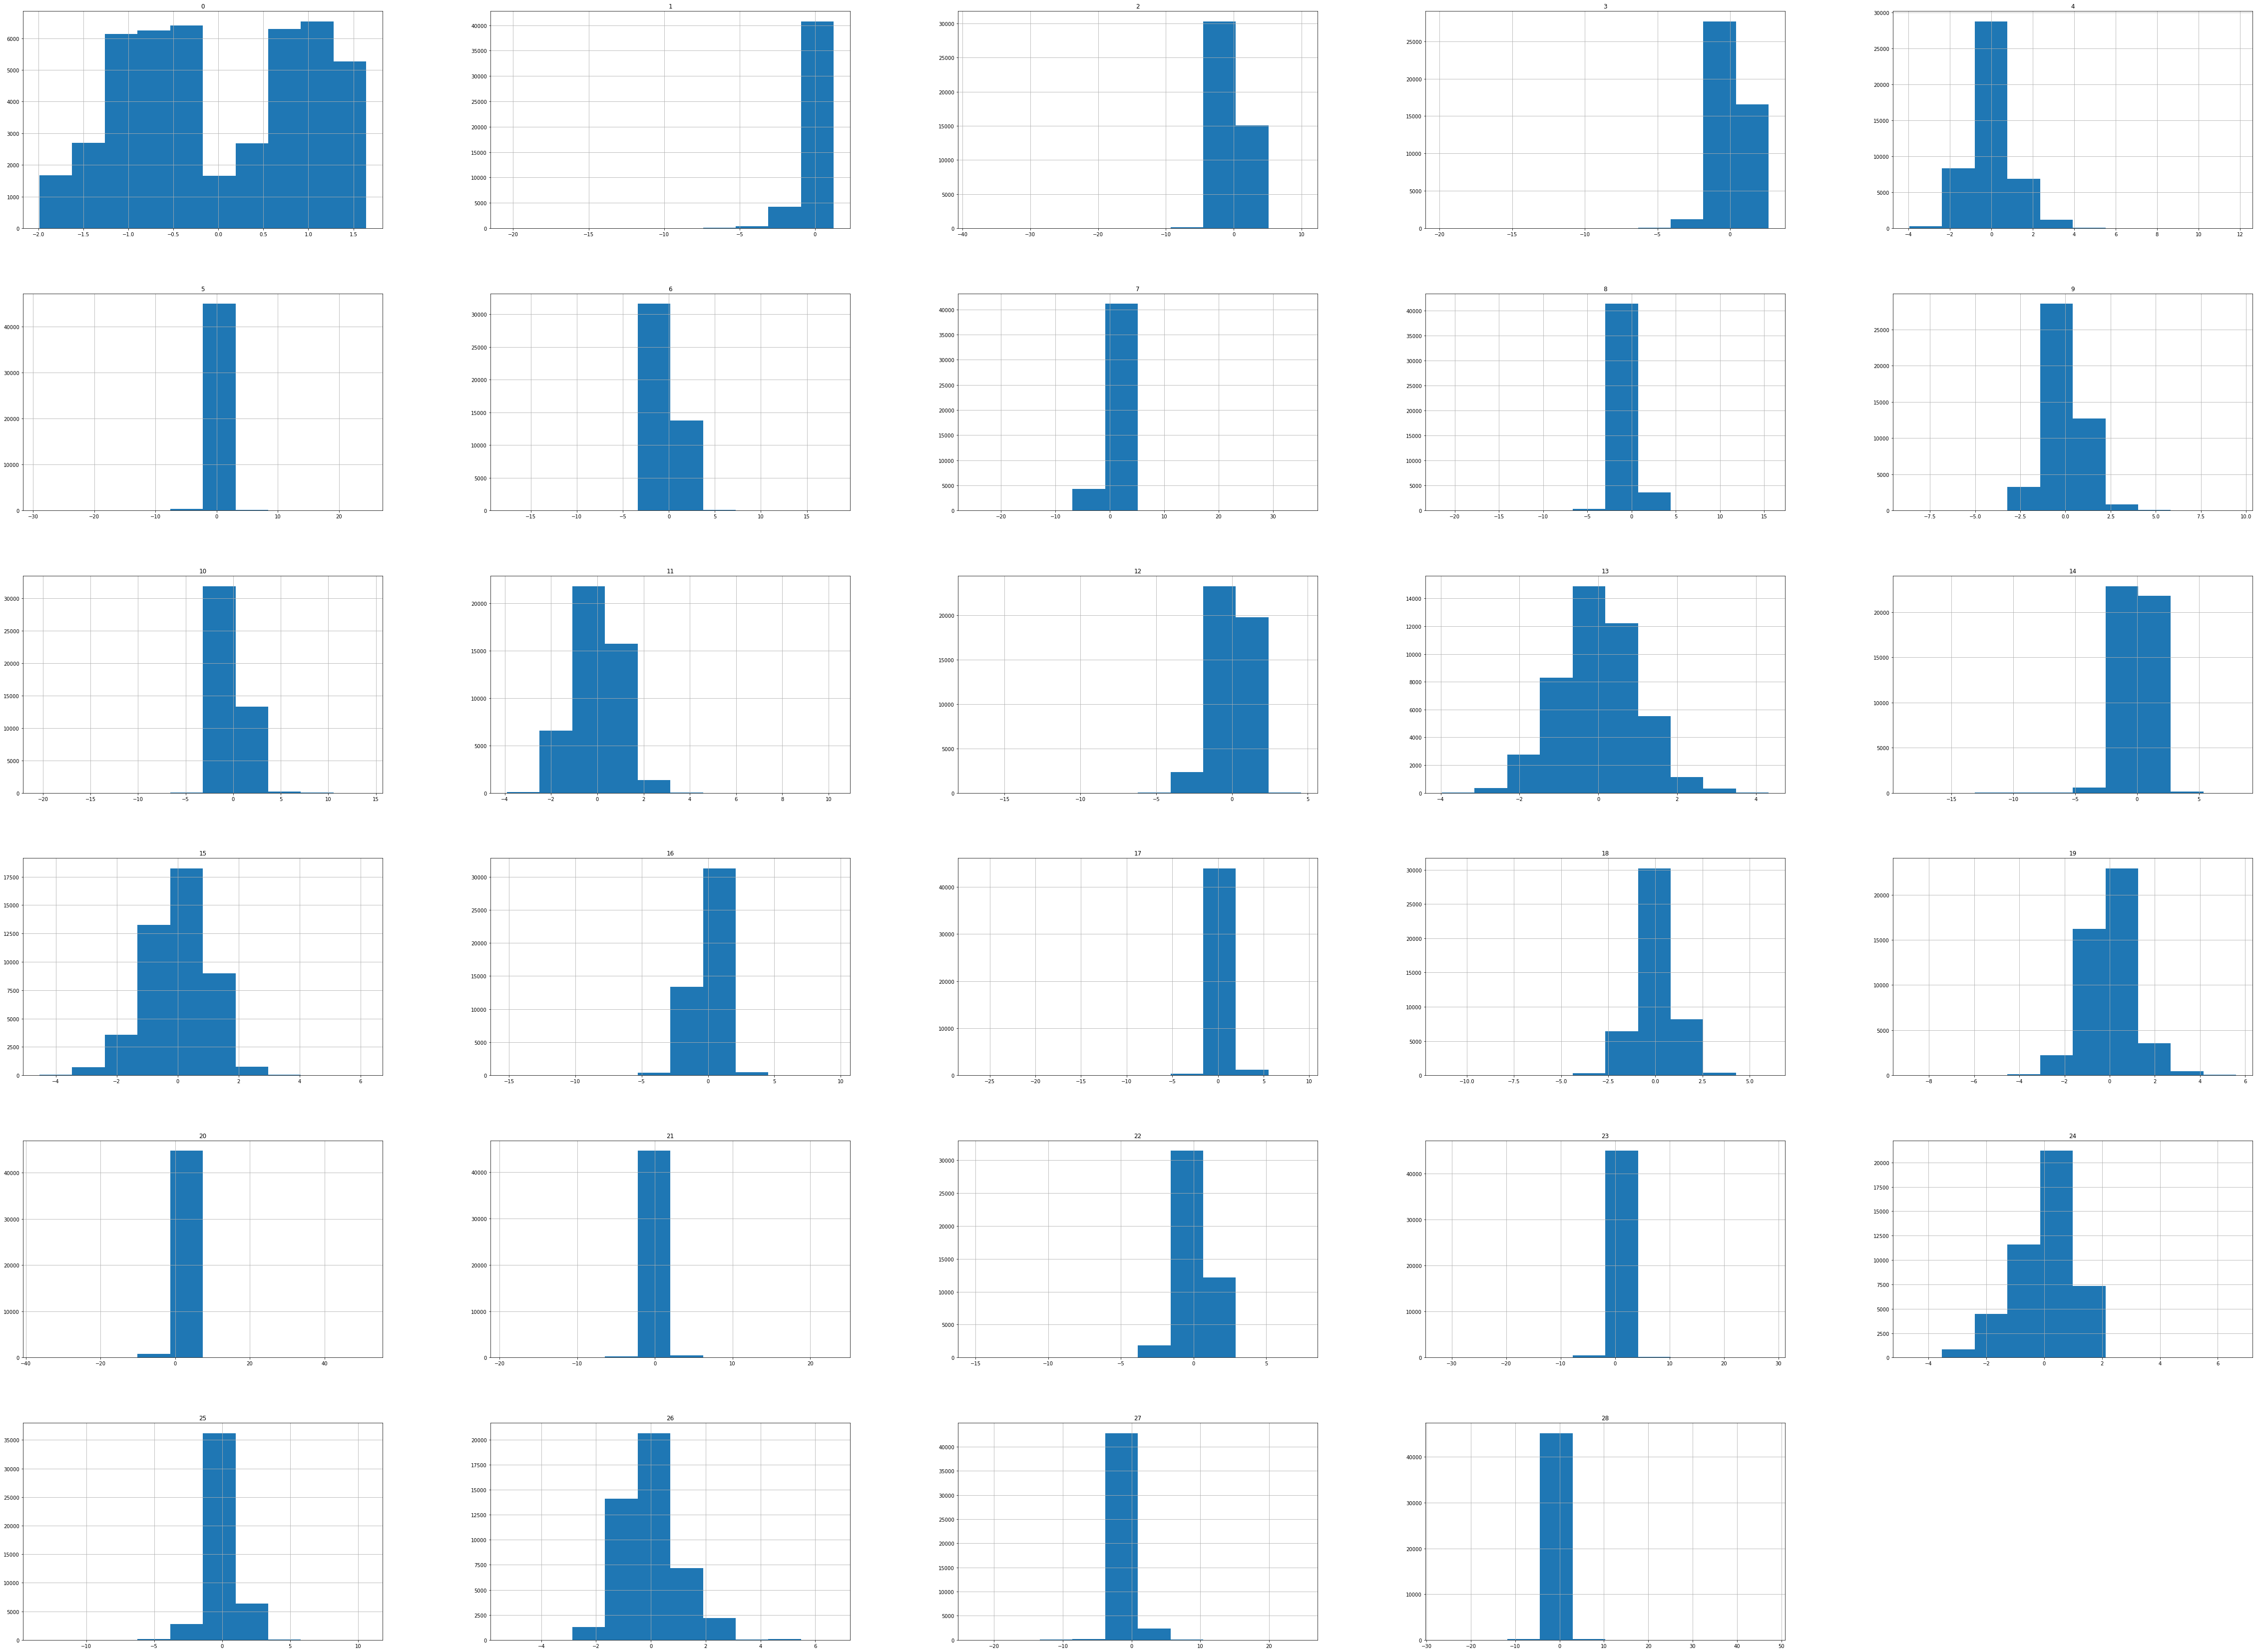

In [35]:
X_val_scaled = standardize_X(standardizer, X_val)
X_val_scaled.hist(figsize = (80,60))

## 7. Apply classification models
The following two models are selected for classifying transactions into fraudulent (1) and non-fraudulent (0) -
1. Logistic regression
2. Random forest

Further, in order to overcome the challenge posed by class imbalance, various treatments are applied on the data before training the model. The treatment resulting in the best performance of the model is considered for application before model selection. The imbalanced class treatments include -
1. None
2. Random undersampling
3. Random oversampling
4. SMOTE oversampling
5. Random oversampling followed by random undersampling

### 7.1. Logistic regression

In [36]:
# Create an instance of the model
logreg = LogisticRegression(max_iter = 1000)

#### 7.1.1. Imbalanced class treatment - None

In [37]:
# Train the model 
logreg_under = logreg.fit(X_train_scaled,y_train)

In [38]:
# Perform 5-fold cross stratified validation
def cross_val(model, X_train, y_train):
    print('Cross-validation report\n')
    scores = cross_validate(model, X_train,y_train, cv=5, scoring=('precision', 'recall', 'f1'), return_train_score=False)
    print('F1 score (1) mean: {} (2)variance: {}'.format(np.mean(scores['test_f1']), np.var(scores['test_f1'])))
    print('Precision score (1) mean: {} (2)variance: {}'.format(np.mean(scores['test_precision']), np.var(scores['test_precision'])))
    print('Recall score (1) mean: {} (2)variance: {}'.format(np.mean(scores['test_recall']), np.var(scores['test_recall'])))
    
cross_val(logreg, X_train_scaled, y_train)

Cross-validation report

F1 score (1) mean: 0.7190214303315324 (2)variance: 0.0015667324046261494
Precision score (1) mean: 0.8765396825396825 (2)variance: 0.0005372073570168806
Recall score (1) mean: 0.6132936507936508 (2)variance: 0.003931135243449233


In [39]:
# Do prediction on validation data
y_pred = logreg.predict(X_val_scaled)

In [40]:
# Print classification result on validation data
def print_clf_result(y_val, y_pred):
    print('Classification result\n')
    print("Accuracy:", metrics.accuracy_score(y_val, y_pred))
    print("F1 score:", metrics.f1_score(y_val, y_pred))
    print("Recall:", metrics.recall_score(y_val, y_pred))
    print("Precision:", metrics.precision_score(y_val, y_pred))
    print("\nClasification report:\n", metrics.classification_report(y_val,y_pred))
    print("\nConfusion matrix:\n", metrics.confusion_matrix(y_val, y_pred))
    
print_clf_result(y_val, y_pred)

Classification result

Accuracy: 0.9993855471921701
F1 score: 0.8055555555555555
Recall: 0.725
Precision: 0.90625

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.91      0.72      0.81        80

    accuracy                           1.00     45569
   macro avg       0.95      0.86      0.90     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45483     6]
 [   22    58]]


The best classification result with logistic regression is often not obtained in case of class imbalance when the default threshold of 0.5 is used to assign classes to calculated probabilities. 

As such, a simple and straightforward approach to improving the performance of a classifier that predicts probabilities on an imbalanced classification problem is to tune the threshold used to map probabilities to class labels. The precision-recall curve allows us to determine the optimal threshold by focusing the performance of a classifier on the positive (and minority) class only. The precision-recall curve is plotted and the optimal (best) threshold for assigning classes is calculated and shown as a black dot.

Best Threshold=0.182929, F-Score=0.852


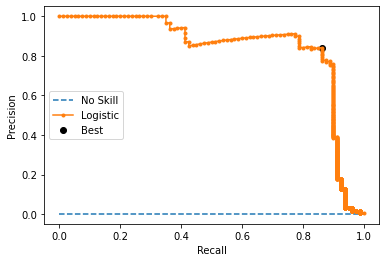

In [41]:
# Find Optimal Threshold for Precision-Recall Curve
def calc_opt_threshold(model, X, y):
    # predict probabilities
    yhat = logreg.predict_proba(X)
    # keep probabilities for the positive outcome only
    yhat = yhat[:, 1]
    # calculate roc curves
    precision, recall, thresholds = precision_recall_curve(y, yhat)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    # plot the pr-curve for the model
    no_skill = len(y[y==1]) / len(y)
    pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    pyplot.plot(recall, precision, marker='.', label='Logistic')
    pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    # show the plot
    pyplot.show()
    return thresholds[ix]

threshold = calc_opt_threshold(logreg, X_val_scaled, y_val)

Finally, the optimal threshold found above is used to assign probabilities indicated by logistic regression to classes. When the values exceed the threshold, the label is set to 1 (fraudulent) and otherwise to 0 (non-fraudulent).

In [42]:
# Perform threshold moving and assign labels to probability
def move_threshold(X,threshold):
    label = np.where(logreg.predict_proba(X)[:,1] > threshold, 1, 0)
    return label

y_pred_new = move_threshold(X_val_scaled, threshold)
print(y_pred_new)

[0 0 0 ... 0 0 0]


In [43]:
# Print results on validation data
print_clf_result(y_val, y_pred_new)

Classification result

Accuracy: 0.9994513814215804
F1 score: 0.84472049689441
Recall: 0.85
Precision: 0.8395061728395061

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.84      0.85      0.84        80

    accuracy                           1.00     45569
   macro avg       0.92      0.92      0.92     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45476    13]
 [   12    68]]


#### 7.1.2. Imbalanced class treatment - Random undersampling

In [44]:
# Apply random undersampling
def rand_undersample(X, y):
    rand_under = RandomUnderSampler(sampling_strategy='majority')
    X_res, y_res = rand_under.fit_sample(X, y)
    return X_res, y_res

X_train_res, y_train_res = rand_undersample(X_train_scaled,y_train)

In [45]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        318
0        318
dtype: int64

In [46]:
# Train the model 
logreg_under = logreg.fit(X_train_res,y_train_res)

In [47]:
# Perform 5-fold cross stratified validation
cross_val(logreg_under, X_train_res, y_train_res)

Cross-validation report

F1 score (1) mean: 0.9103051304667542 (2)variance: 0.0003169438613447295
Precision score (1) mean: 0.9430109645423934 (2)variance: 0.0002473184547870359
Recall score (1) mean: 0.8804067460317461 (2)variance: 0.0008841569035021428


In [48]:
# Do prediction on validation data
y_pred = logreg_under.predict(X_val_scaled)

In [49]:
# Print classification result on validation data
print_clf_result(y_val, y_pred)

Classification result

Accuracy: 0.9690798569202748
F1 score: 0.0985284708893154
Recall: 0.9625
Precision: 0.051921780175320294

Clasification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     45489
           1       0.05      0.96      0.10        80

    accuracy                           0.97     45569
   macro avg       0.53      0.97      0.54     45569
weighted avg       1.00      0.97      0.98     45569


Confusion matrix:
 [[44083  1406]
 [    3    77]]


Best Threshold=0.999999, F-Score=0.765


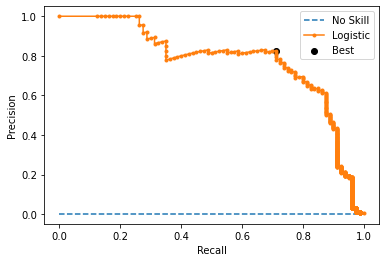

In [50]:
# Find Optimal Threshold for Precision-Recall Curve
threshold = calc_opt_threshold(logreg_under, X_val_scaled, y_val)

In [51]:
# Perform threshold moving and assign labels to probability
y_pred_new = move_threshold(X_val_scaled, threshold)
print(y_pred_new)

[0 0 0 ... 0 0 0]


In [52]:
# Print results on validation data
print_clf_result(y_val, y_pred_new)

Classification result

Accuracy: 0.9992099892470758
F1 score: 0.7567567567567567
Recall: 0.7
Precision: 0.8235294117647058

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.82      0.70      0.76        80

    accuracy                           1.00     45569
   macro avg       0.91      0.85      0.88     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45477    12]
 [   24    56]]


#### 7.1.3. Imbalanced class treatment - Random oversampling

In [53]:
# Apply random oversampling
def rand_oversample(X, y):
    rand_over = RandomOverSampler(sampling_strategy='minority')
    X_res, y_res = rand_over.fit_sample(X, y)
    return X_res, y_res

X_train_res, y_train_res = rand_oversample(X_train_scaled,y_train)

In [54]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        181958
0        181958
dtype: int64

In [55]:
# Train the model 
logreg_over = logreg.fit(X_train_res,y_train_res) 

In [56]:
# Perform 5-fold cross stratified validation
cross_val(logreg_over, X_train_res, y_train_res)

Cross-validation report

F1 score (1) mean: 0.9387392676109616 (2)variance: 1.3218396701291021e-06
Precision score (1) mean: 0.9729271391157479 (2)variance: 2.324751985366141e-06
Recall score (1) mean: 0.9068741012550727 (2)variance: 1.954081570905278e-06


In [57]:
# Do prediction on validation data
y_pred = logreg_over.predict(X_val_scaled)

In [58]:
# Print classification result on validation data
print_clf_result(y_val, y_pred)

Classification result

Accuracy: 0.9741052030985977
F1 score: 0.1154422788605697
Recall: 0.9625
Precision: 0.06140350877192982

Clasification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     45489
           1       0.06      0.96      0.12        80

    accuracy                           0.97     45569
   macro avg       0.53      0.97      0.55     45569
weighted avg       1.00      0.97      0.99     45569


Confusion matrix:
 [[44312  1177]
 [    3    77]]


Best Threshold=0.999977, F-Score=0.863


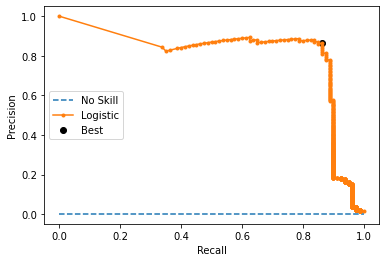

In [59]:
# Find Optimal Threshold for Precision-Recall Curve
threshold = calc_opt_threshold(logreg_over, X_val_scaled, y_val)

In [60]:
# Perform threshold moving and assign labels to probability
y_pred_new = move_threshold(X_val_scaled, threshold)
print(y_pred_new)

[0 0 0 ... 0 0 0]


In [61]:
# Print results on validation data
print_clf_result(y_val, y_pred_new)

Classification result

Accuracy: 0.9994952709078541
F1 score: 0.8553459119496856
Recall: 0.85
Precision: 0.8607594936708861

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.86      0.85      0.86        80

    accuracy                           1.00     45569
   macro avg       0.93      0.92      0.93     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45478    11]
 [   12    68]]


#### 7.1.4. Imbalanced class treatment - SMOTE oversampling

In [62]:
# Apply SMOTE oversampling
smote = SMOTE()
X_train_res, y_train_res = smote.fit_sample(X_train_scaled, y_train)

In [63]:
# Train the model 
logreg_smote = logreg.fit(X_train_res,y_train_res) 

In [64]:
# Perform 5-fold cross stratified validation
cross_val(logreg_smote, X_train_res, y_train_res)

Cross-validation report

F1 score (1) mean: 0.9381764336391105 (2)variance: 1.4336703176262211e-06
Precision score (1) mean: 0.969568723727912 (2)variance: 1.847169420519811e-06
Recall score (1) mean: 0.9087536649692209 (2)variance: 1.5046404643034443e-06


In [65]:
# Do prediction on validation data
y_pred = logreg_smote.predict(X_val_scaled)

In [66]:
# Print classification result on validation data
print_clf_result(y_val, y_pred)

Classification result

Accuracy: 0.970769602141807
F1 score: 0.10363391655450874
Recall: 0.9625
Precision: 0.05476529160739687

Clasification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     45489
           1       0.05      0.96      0.10        80

    accuracy                           0.97     45569
   macro avg       0.53      0.97      0.54     45569
weighted avg       1.00      0.97      0.98     45569


Confusion matrix:
 [[44160  1329]
 [    3    77]]


Best Threshold=0.999997, F-Score=0.868


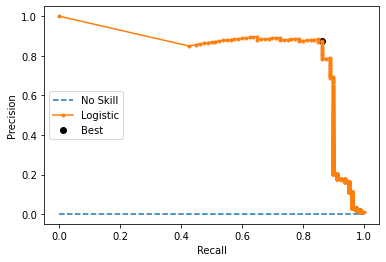

In [67]:
# Find Optimal Threshold for Precision-Recall Curve
threshold = calc_opt_threshold(logreg_smote, X_val_scaled, y_val)

In [68]:
# Perform threshold moving and assign labels to probability
y_pred_new = move_threshold(X_val_scaled, threshold)
print(y_pred_new)

[0 0 0 ... 0 0 0]


In [69]:
# Print results on validation data
print_clf_result(y_val, y_pred_new)

Classification result

Accuracy: 0.9995172156509908
F1 score: 0.8607594936708861
Recall: 0.85
Precision: 0.8717948717948718

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.87      0.85      0.86        80

    accuracy                           1.00     45569
   macro avg       0.94      0.92      0.93     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45479    10]
 [   12    68]]


#### 7.1.5. Imbalanced class treatment - Combined random undersampling and oversampling

In [70]:
# Apply random oversampling followed by undersampling
X_train_inter, y_train_inter = rand_oversample(X_train_scaled, y_train)
X_train_res, y_train_res = rand_undersample(X_train_inter, y_train_inter)

In [71]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        181958
0        181958
dtype: int64

In [72]:
# Train the model 
logreg_combo = logreg.fit(X_train_res,y_train_res) 

In [73]:
# Perform 5-fold cross stratified validation
cross_val(logreg_combo, X_train_res, y_train_res)

Cross-validation report

F1 score (1) mean: 0.9372270964016826 (2)variance: 2.8834557353963865e-06
Precision score (1) mean: 0.9726928654279844 (2)variance: 1.2278170860891448e-06
Recall score (1) mean: 0.9042581276588049 (2)variance: 5.564952733773401e-06


In [74]:
# Do prediction on validation data
y_pred = logreg_combo.predict(X_val_scaled)

In [75]:
# Print classification result on validation data
print_clf_result(y_val, y_pred)

Classification result

Accuracy: 0.9736004740064518
F1 score: 0.11348563006632277
Recall: 0.9625
Precision: 0.060297572435395456

Clasification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     45489
           1       0.06      0.96      0.11        80

    accuracy                           0.97     45569
   macro avg       0.53      0.97      0.55     45569
weighted avg       1.00      0.97      0.99     45569


Confusion matrix:
 [[44289  1200]
 [    3    77]]


Best Threshold=0.999980, F-Score=0.863


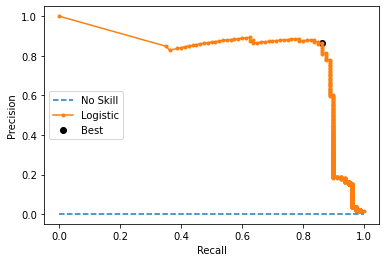

In [76]:
# Find Optimal Threshold for Precision-Recall Curve
threshold = calc_opt_threshold(logreg_combo, X_val_scaled, y_val)

In [77]:
# Perform threshold moving and assign labels to probability
y_pred_new = move_threshold(X_val_scaled, threshold)
print(y_pred_new)

[0 0 0 ... 0 0 0]


In [78]:
# Print results on validation data
print_clf_result(y_val, y_pred_new)

Classification result

Accuracy: 0.9994952709078541
F1 score: 0.8553459119496856
Recall: 0.85
Precision: 0.8607594936708861

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.86      0.85      0.86        80

    accuracy                           1.00     45569
   macro avg       0.93      0.92      0.93     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45478    11]
 [   12    68]]


### 7.2. Decision Tree

In [79]:
# Create an instance of the model
dectree = DecisionTreeClassifier(random_state=0, criterion='entropy')

#### 7.2.1. Imbalanced class treatment - None

In [80]:
# Train the model 
dectree = dectree.fit(X_train_scaled,y_train)

In [81]:
# Perform 5-fold cross stratified validation
cross_val(dectree, X_train_scaled, y_train)

Cross-validation report

F1 score (1) mean: 0.7565530955458192 (2)variance: 0.0007560788349055074
Precision score (1) mean: 0.7650885103012338 (2)variance: 0.000646436619112835
Recall score (1) mean: 0.7513392857142858 (2)variance: 0.0033041127330561853


In [82]:
# Do prediction on validation data
y_pred = dectree.predict(X_val_scaled)

In [83]:
# Print classification result on validation data
print_clf_result(y_val, y_pred)

Classification result

Accuracy: 0.9991222102745287
F1 score: 0.7530864197530863
Recall: 0.7625
Precision: 0.7439024390243902

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.74      0.76      0.75        80

    accuracy                           1.00     45569
   macro avg       0.87      0.88      0.88     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45468    21]
 [   19    61]]


#### 7.2.2. Imbalanced class treatment - Random undersampling

In [84]:
# Apply random undersampling
X_train_res, y_train_res = rand_undersample(X_train_scaled,y_train)

In [85]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        318
0        318
dtype: int64

In [86]:
# Train the model 
dectree_under = dectree.fit(X_train_res,y_train_res)

In [87]:
# Perform 5-fold cross stratified validation
cross_val(dectree_under, X_train_res, y_train_res)

# Do prediction on validation data
y_pred = dectree_under.predict(X_val_scaled)

# Print classification result on validation data
print_clf_result(y_val, y_pred)

Cross-validation report

F1 score (1) mean: 0.902061338046191 (2)variance: 0.0005702745596018831
Precision score (1) mean: 0.8959730898713347 (2)variance: 0.0014439067179726852
Recall score (1) mean: 0.9088789682539682 (2)variance: 0.00022546808075081886
Classification result

Accuracy: 0.8752441352673968
F1 score: 0.02604077437039575
Recall: 0.95
Precision: 0.013201320132013201

Clasification report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93     45489
           1       0.01      0.95      0.03        80

    accuracy                           0.88     45569
   macro avg       0.51      0.91      0.48     45569
weighted avg       1.00      0.88      0.93     45569


Confusion matrix:
 [[39808  5681]
 [    4    76]]


#### 7.2.3. Imbalanced class treatment - Random oversampling

In [88]:
# Apply random oversampling
X_train_res, y_train_res = rand_oversample(X_train_scaled,y_train)

In [89]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        181958
0        181958
dtype: int64

In [90]:
# Train the model 
dectree_over = dectree.fit(X_train_res,y_train_res)

In [91]:
# Perform 5-fold cross stratified validation
cross_val(dectree_over, X_train_res, y_train_res)

# Do prediction on validation data
y_pred = dectree_over.predict(X_val_scaled)

# Print classification result on validation data
print_clf_result(y_val, y_pred)

Cross-validation report

F1 score (1) mean: 0.9997582462105491 (2)variance: 1.4028797882934374e-09
Precision score (1) mean: 0.9995166120863234 (2)variance: 5.605943129860589e-09
Recall score (1) mean: 1.0 (2)variance: 0.0
Classification result

Accuracy: 0.9993197129627598
F1 score: 0.8165680473372781
Recall: 0.8625
Precision: 0.7752808988764045

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.78      0.86      0.82        80

    accuracy                           1.00     45569
   macro avg       0.89      0.93      0.91     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45469    20]
 [   11    69]]


#### 7.2.4. Imbalanced class treatment - SMOTE oversampling

In [92]:
# Apply SMOTE oversampling
smote = SMOTE()
X_train_res, y_train_res = smote.fit_sample(X_train_scaled, y_train)

In [93]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        181958
0        181958
dtype: int64

In [94]:
# Train the model 
dectree_smote = dectree.fit(X_train_res,y_train_res) 

In [95]:
# Perform 5-fold cross stratified validation
cross_val(dectree_smote, X_train_res, y_train_res)

# Do prediction on validation data
y_pred = dectree_smote.predict(X_val_scaled)

# Print classification result on validation data
print_clf_result(y_val, y_pred)

Cross-validation report

F1 score (1) mean: 0.9983856528776716 (2)variance: 2.6634031316615237e-08
Precision score (1) mean: 0.9975312500626641 (2)variance: 1.0742984977464088e-07
Recall score (1) mean: 0.9992415823464572 (2)variance: 7.129348642760644e-09
Classification result

Accuracy: 0.9974982992824069
F1 score: 0.5365853658536586
Recall: 0.825
Precision: 0.39759036144578314

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.40      0.82      0.54        80

    accuracy                           1.00     45569
   macro avg       0.70      0.91      0.77     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45389   100]
 [   14    66]]


#### 7.2.5. Imbalanced class treatment - Combined random undersampling and oversampling

In [96]:
# Apply random oversampling followed by undersampling
X_train_inter, y_train_inter = rand_oversample(X_train_scaled, y_train)
X_train_res, y_train_res = rand_undersample(X_train_inter, y_train_inter)

In [97]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        181958
0        181958
dtype: int64

In [98]:
# Train the model 
dectree_combo = dectree.fit(X_train_res,y_train_res) 

In [99]:
# Perform 5-fold cross stratified validation
cross_val(dectree_combo, X_train_res, y_train_res)

# Do prediction on validation data
y_pred = dectree_combo.predict(X_val_scaled)

# Print classification result on validation data
print_clf_result(y_val, y_pred)

Cross-validation report

F1 score (1) mean: 0.999744517681964 (2)variance: 6.080725992998362e-09
Precision score (1) mean: 0.9994891780260954 (2)variance: 2.4301841443750238e-08
Recall score (1) mean: 1.0 (2)variance: 0.0
Classification result

Accuracy: 0.9993416577058966
F1 score: 0.8214285714285715
Recall: 0.8625
Precision: 0.7840909090909091

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.78      0.86      0.82        80

    accuracy                           1.00     45569
   macro avg       0.89      0.93      0.91     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45470    19]
 [   11    69]]


### 7.3. Random forest

In [100]:
# Create an instance of the model
randforest = RandomForestClassifier()

#### 7.3.1. Imbalanced class treatment - None

In [101]:
# Train the model 
randforest = randforest.fit(X_train_scaled,y_train)

In [102]:
# Perform 5-fold cross stratified validation
cross_val(randforest, X_train_scaled, y_train)

Cross-validation report

F1 score (1) mean: 0.8464622656765111 (2)variance: 0.0010575546953839367
Precision score (1) mean: 0.9572351269166702 (2)variance: 0.00014695610462347013
Recall score (1) mean: 0.7610119047619047 (2)variance: 0.00336589525856639


In [103]:
# Do prediction on validation data
y_pred = randforest.predict(X_val_scaled)

In [104]:
# Print classification result on validation data
print_clf_result(y_val, y_pred)

Classification result

Accuracy: 0.9996269393666747
F1 score: 0.8874172185430463
Recall: 0.8375
Precision: 0.9436619718309859

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.94      0.84      0.89        80

    accuracy                           1.00     45569
   macro avg       0.97      0.92      0.94     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45485     4]
 [   13    67]]


#### 7.3.2. Imbalanced class treatment - Random undersampling

In [105]:
# Apply random undersampling
X_train_res, y_train_res = rand_undersample(X_train_scaled,y_train)

In [106]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        318
0        318
dtype: int64

In [107]:
# Train the model 
randforest_under = randforest.fit(X_train_res,y_train_res)

In [108]:
# Perform 5-fold cross stratified validation
cross_val(randforest_under, X_train_res, y_train_res)

# Do prediction on validation data
y_pred = randforest_under.predict(X_val_scaled)

# Print classification result on validation data
print_clf_result(y_val, y_pred)

Cross-validation report

F1 score (1) mean: 0.9308650954508119 (2)variance: 0.00037811398418804423
Precision score (1) mean: 0.9758495449611756 (2)variance: 0.00030585813814793433
Recall score (1) mean: 0.8899305555555556 (2)variance: 0.0005015038422776519
Classification result

Accuracy: 0.9606311308126139
F1 score: 0.07810894141829394
Recall: 0.95
Precision: 0.04072883172561629

Clasification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     45489
           1       0.04      0.95      0.08        80

    accuracy                           0.96     45569
   macro avg       0.52      0.96      0.53     45569
weighted avg       1.00      0.96      0.98     45569


Confusion matrix:
 [[43699  1790]
 [    4    76]]


#### 7.3.3. Imbalanced class treatment - Random oversampling

In [109]:
# Apply random undersampling
X_train_res, y_train_res = rand_oversample(X_train_scaled,y_train)

In [110]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        181958
0        181958
dtype: int64

In [111]:
# Train the model 
randforest_over = randforest.fit(X_train_res,y_train_res)

In [112]:
# Perform 5-fold cross stratified validation
cross_val(randforest_over, X_train_res, y_train_res)

# Do prediction on validation data
y_pred = randforest_over.predict(X_val_scaled)

# Print classification result on validation data
print_clf_result(y_val, y_pred)

Cross-validation report

F1 score (1) mean: 0.9999725222638288 (2)variance: 2.2650281655233175e-10
Precision score (1) mean: 0.9999450464906424 (2)variance: 9.059365869173714e-10
Recall score (1) mean: 1.0 (2)variance: 0.0
Classification result

Accuracy: 0.9996927735960851
F1 score: 0.9078947368421054
Recall: 0.8625
Precision: 0.9583333333333334

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.96      0.86      0.91        80

    accuracy                           1.00     45569
   macro avg       0.98      0.93      0.95     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45486     3]
 [   11    69]]


#### 7.3.4. Imbalanced class treatment - SMOTE oversampling

In [113]:
# Apply SMOTE oversampling
smote = SMOTE()
X_train_res, y_train_res = smote.fit_sample(X_train_scaled, y_train)

In [114]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        181958
0        181958
dtype: int64

In [115]:
# Train the model 
randforest_smote = randforest.fit(X_train_res,y_train_res)

In [116]:
# Perform 5-fold cross stratified validation
cross_val(randforest_smote, X_train_res, y_train_res)

# Do prediction on validation data
y_pred = randforest_smote.predict(X_val_scaled)

# Print classification result on validation data
print_clf_result(y_val, y_pred)

Cross-validation report

F1 score (1) mean: 0.9999313079245645 (2)variance: 3.774486841628679e-10
Precision score (1) mean: 0.9998626260404253 (2)variance: 1.5093799620353433e-09
Recall score (1) mean: 1.0 (2)variance: 0.0
Classification result

Accuracy: 0.9996269393666747
F1 score: 0.8930817610062892
Recall: 0.8875
Precision: 0.8987341772151899

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.90      0.89      0.89        80

    accuracy                           1.00     45569
   macro avg       0.95      0.94      0.95     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45481     8]
 [    9    71]]


#### 7.3.5. Imbalanced class treatment - Combined random undersampling and oversampling

In [117]:
# Apply random oversampling followed by undersampling
X_train_inter, y_train_inter = rand_oversample(X_train_scaled, y_train)
X_train_res, y_train_res = rand_undersample(X_train_inter, y_train_inter)

In [118]:
temp = pd.DataFrame(y_train_res)
temp.value_counts()

Class
1        181958
0        181958
dtype: int64

In [119]:
# Train the model 
randforest_combo = randforest.fit(X_train_res,y_train_res)

In [120]:
# Perform 5-fold cross stratified validation
cross_val(randforest_combo, X_train_res, y_train_res)

# Do prediction on validation data
y_pred = randforest_combo.predict(X_val_scaled)

# Print classification result on validation data
print_clf_result(y_val, y_pred)

Cross-validation report

F1 score (1) mean: 0.9999587839997641 (2)variance: 5.285024225077803e-10
Precision score (1) mean: 0.9999175724537983 (2)variance: 2.1137358770828847e-09
Recall score (1) mean: 1.0 (2)variance: 0.0
Classification result

Accuracy: 0.9996927735960851
F1 score: 0.9078947368421054
Recall: 0.8625
Precision: 0.9583333333333334

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45489
           1       0.96      0.86      0.91        80

    accuracy                           1.00     45569
   macro avg       0.98      0.93      0.95     45569
weighted avg       1.00      1.00      1.00     45569


Confusion matrix:
 [[45486     3]
 [   11    69]]


## 8. Model selection

It is most important that we correctly predict as many as possible cases of fraud. Failure to identify a true fraudulent transaction can be costly, and therefore, we are primarily looking for a model that has high recall. At the same time, the model should also exhibit reasonably high precision as we want to avoid calling a non-fraudulent transaction a fraudulent one. Therefore, models with high F1 score are desirable, and one with high recall is preferable. 

By going through the classification reports generated above, we can see that random forest clearly performs better than logistic regression in terms of F1 score.

Random forest run on randomly oversampled data, SMOTE oversampled data, and randomly undersampled data after being randomly oversampled are key contenders for model selection with F1 scores on label 1 of 0.82, 0.81 and 0.82 respectively. Further inspection of classification reports indicates that 3% more recall and 6% less precision was obtained when random forest was run on SMOTE oversampled data than in the other two cases. As we want to primarily minimize false negatives, we settle for slightly less precision and higher recall. The best classifier is therefore chosen to be random forest after oversampling data using SMOTE.

In [121]:
best_classifier = randforest_smote

## 9. Apply model to test data

### 9.1. Pre-process test data

In [122]:
X_test = test_data_raw.drop(['Amount','Class'],axis=1)
print(X_test.shape)

(56962, 29)


In [123]:
y_test = test_data_raw['Class']
print(y_test.shape)

(56962,)


### 9.2. Standardize test data

In [124]:
X_test_scaled = standardize_X(standardizer, X_test)

### Run classification model on test data

In [125]:
# Do prediction on test data
y_pred = best_classifier.predict(X_test_scaled)

### Classification result

In [126]:
# Print classification result on validation data
print_clf_result(y_test, y_pred)

Classification result

Accuracy: 0.9994382219725431
F1 score: 0.8160919540229885
Recall: 0.7553191489361702
Precision: 0.8875

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.89      0.76      0.82        94

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion matrix:
 [[56859     9]
 [   23    71]]


The result indicates an F1 score of 0.82 with ~89% precision and ~76% recall.